In [1]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# geopandas 및 관련 패키지 설치
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

폰트 설치한 후에는 런타임 다시 시작이 필요합니다

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') #한글 폰트 적용

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
# 해양생물해역
gdf_live = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_zn_ocn_lvb_sarea.shp', encoding="UTF-8")
gdf_live.info()
gdf_live.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         5 non-null      int64   
 1   sarea_korn  5 non-null      object  
 2   ssea_id     5 non-null      object  
 3   geometry    5 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 288.0+ bytes


,gid,sarea_korn,ssea_id,geometry
0,5,동해남부,ES,"POLYGON ((129.66570 35.06455, 129.40532 34.971..."
1,4,남해동부,SE,"POLYGON ((127.82165 33.16382, 127.80000 33.121..."
2,3,서해,W,"POLYGON ((127.00000 38.00000, 127.00000 35.300..."
3,2,남해서부,SW,"POLYGON ((126.27256 30.28900, 126.21167 30.271..."
4,1,동해중부,EM,"POLYGON ((132.14285 36.50000, 129.30000 36.500..."


In [7]:
# 보호구역
gdf_protect = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/protect_zone.shp', encoding="UTF-8")
gdf_protect.info()
gdf_protect.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         435 non-null    int64   
 1   lyr_nm      435 non-null    object  
 2   zn_nm       435 non-null    object  
 3   appn_year   435 non-null    object  
 4   mng_inst_n  435 non-null    object  
 5   geometry    435 non-null    geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 20.5+ KB


,gid,lyr_nm,zn_nm,appn_year,mng_inst_n,geometry
0,1,국립공원,치악산,1984,환경부,"POLYGON ((128.11174 37.41916, 128.11169 37.418..."
1,2,환경보전해역,득량만,2000,해양수산부,"POLYGON ((127.15327 34.58831, 127.15183 34.588..."
2,3,환경보전해역,완도-도암만,2000,해양수산부,"POLYGON ((126.93888 34.44756, 126.93907 34.447..."
3,5,시_도습지보호지역,대구달성하천습지,2007,환경부,"POLYGON ((128.48094 35.83347, 128.48096 35.833..."
4,6,도립공원,칠갑산,1973,환경부,"POLYGON ((126.82187 36.37861, 126.82121 36.378..."


In [8]:
# 해양생물해역과 보호구역을 공간 중첩 
gdf_overlay = gpd.overlay(gdf_live, gdf_protect, how='intersection')
gdf_overlay.head()

,gid_1,sarea_korn,ssea_id,gid_2,lyr_nm,zn_nm,appn_year,mng_inst_n,geometry
0,5,동해남부,ES,46,시_도생태경관보전지역,석은담 계곡,2015,환경부,"POLYGON ((129.19894 35.35228, 129.19896 35.352..."
1,5,동해남부,ES,49,군립공원,보경사,1983,환경부,"POLYGON ((129.32888 36.23848, 129.32833 36.239..."
2,5,동해남부,ES,115,습지보호지역,화엄늪,2002,환경부,"POLYGON ((129.10268 35.40472, 129.10201 35.404..."
3,5,동해남부,ES,92,국립공원,주왕산,1976,환경부,"POLYGON ((129.07892 36.43755, 129.07918 36.437..."
4,5,동해남부,ES,97,시_도생태경관보전지역,장산습지,2017,환경부,"POLYGON ((129.15649 35.20828, 129.15655 35.208..."


<Axes: >

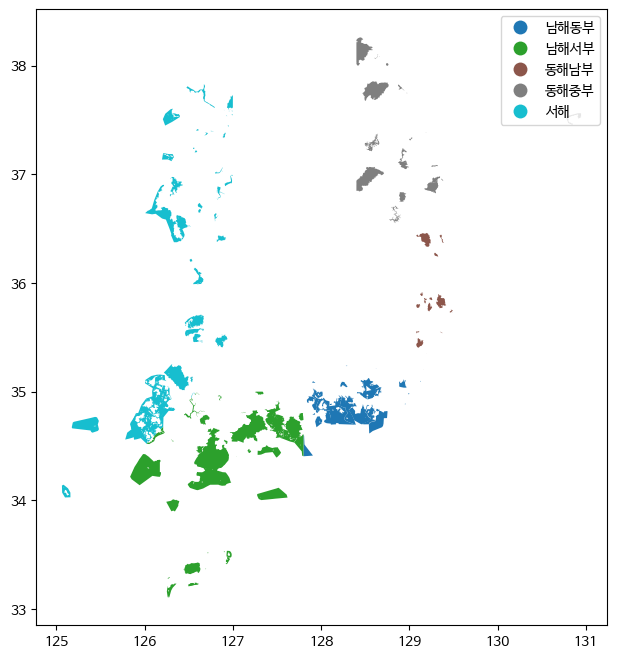

In [9]:
gdf_overlay.plot('sarea_korn',categorical=True, legend=True, figsize=(8, 8))

Geopandas의 Overlay 설명 페이지   
https://geopandas.org/en/stable/docs/user_guide/set_operations.html

## 육지에 해당하는 영역을 제거

<Axes: >

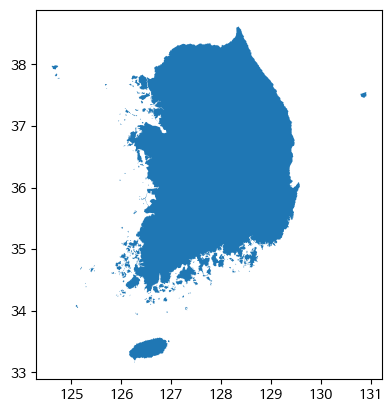

In [10]:
# 우리나라 육지 영역
gdf_kor = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/korea.shp')
gdf_kor.plot()

In [11]:
# overlay에서 육지부 영역을 공간 중첩하여 육지부 영역을 제외 
gdf_overlay2 = gpd.overlay(gdf_overlay, gdf_kor, how='difference')
gdf_overlay2.head()

,gid_1,sarea_korn,ssea_id,gid_2,lyr_nm,zn_nm,appn_year,mng_inst_n,geometry
0,5,동해남부,ES,283,국립공원,경주,1968,환경부,"MULTIPOLYGON (((129.49301 35.75017, 129.49384 ..."
1,4,남해동부,SE,47,군립공원,상족암,1983,환경부,"POLYGON ((128.18058 34.88437, 128.18035 34.884..."
2,4,남해동부,SE,63,습지보호지역,낙동강하구,1999,환경부,"POLYGON ((128.92425 35.03872, 128.91541 35.040..."
3,4,남해동부,SE,100,해양보호구역,경남 고성군 상괭이 해역,2019,해양수산부,"POLYGON ((128.11805 34.88966, 128.12032 34.887..."
4,4,남해동부,SE,120,습지보호지역-갯벌,마산만 봉암갯벌,2011,해양수산부,"POLYGON ((128.62651 35.21694, 128.62694 35.217..."


<Axes: >

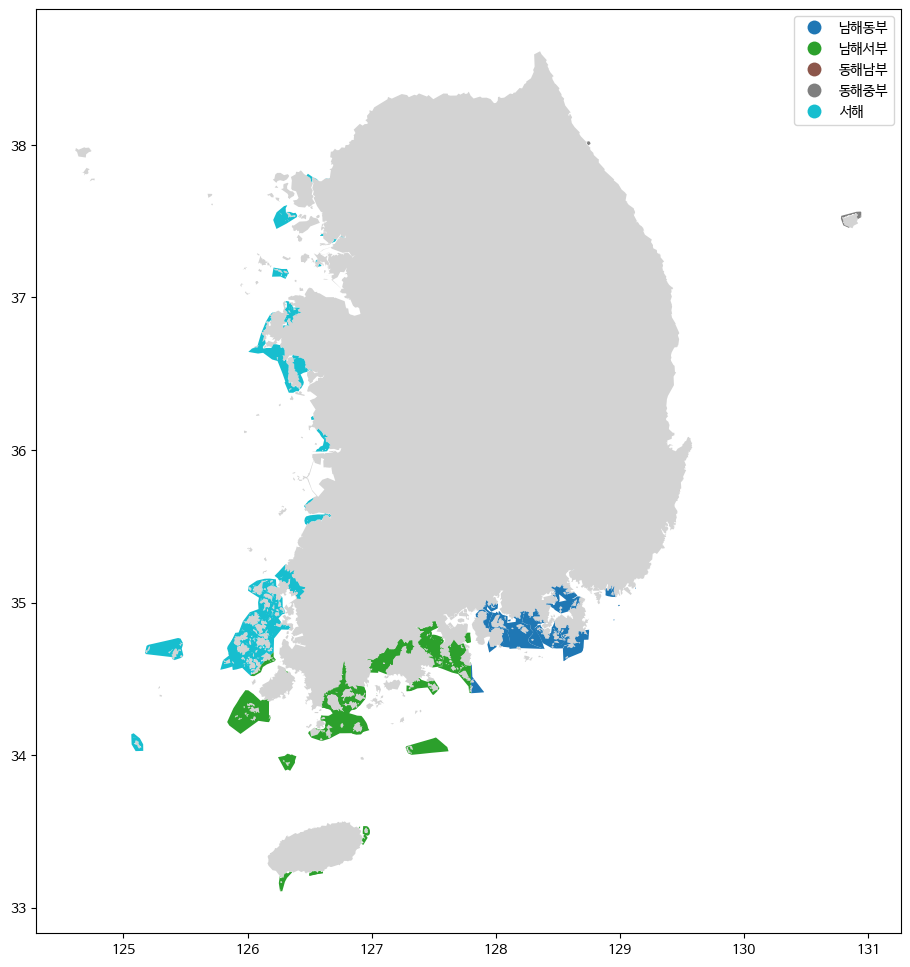

In [12]:
ax = gdf_kor.plot(color='lightgrey', figsize=(12, 12))    
gdf_overlay2.plot('sarea_korn',categorical=True, legend=True, ax=ax)

## 해양생물해역 속성이 포함된 실제 해양에 해당하는 해양보호구역이 생성됨

In [13]:
# geopandas.explore를 이용한 지도화
gdf_overlay2.explore('sarea_korn', categorical=True, tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}&s=Ga', attr='google')

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# 중첩 결과 영역을 shp으로 저장 
gdf_overlay2.to_file('/content/gdrive/My Drive/Colab Notebooks/sea/result/protect_zone2.shp', encoding='UTF-8')